# Supervised Learning

Supervised learning is broken up into two main types, _classification_ and _regression_. We'll go over a couple examples using kNN and Decision Trees using scikit-learn (sklearn).

## scikit-learn API

We'll be using scikit-learn throughout the introductory portion of the class and so it's important to understand the basic API that models in that library implement. Models in scikit-learn are called _Estimators_ and the steps to use some of them are:

1. Initialize the model by setting its parameters `model = Model(param_1=val, param_2=val)`
1. Fit the model using `model.fit(features, labels)`
1. Predict using the model `model.predict(features)`


In [0]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn as sk

%matplotlib inline
plt.style.use("ggplot")

In [0]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [0]:
X, y = make_blobs(n_samples=1000,random_state=0)

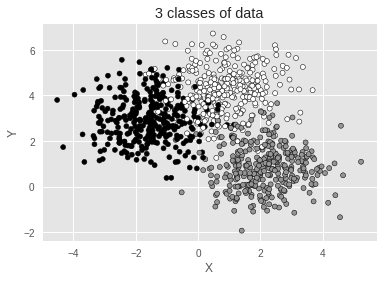

In [8]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')
plt.title("3 classes of data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
X_model, X_valid, y_model, y_valid = train_test_split(X_train, y_train, random_state=0, test_size=0.2)

print(f"All Data:        {len(X)} points")
print(f"Training data:   {len(X_train)} points")
print(f"Testing data:    {len(X_test)} points")
print(f"Modeling data:   {len(X_model)} points")
print(f"Validation data: {len(X_valid)} points")

All Data:        1000 points
Training data:   800 points
Testing data:    200 points
Modeling data:   640 points
Validation data: 160 points


In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
k = 5

# Step 1 - Initialize model with parameters
knn = KNeighborsClassifier(n_neighbors=k)
# Step 2 - Fit the model data
knn.fit(X_model, y_model)
# Step 3 - Predict the validation data
validationPredictions = knn.predict(X_valid)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [13]:
print(confusion_matrix(y_valid, validationPredictions))

[[50  5  3]
 [ 1 40  1]
 [ 5  3 52]]


In [14]:
print(classification_report(y_valid,validationPredictions))

             precision    recall  f1-score   support

          0       0.89      0.86      0.88        58
          1       0.83      0.95      0.89        42
          2       0.93      0.87      0.90        60

avg / total       0.89      0.89      0.89       160



In [15]:
f1_score(y_valid, validationPredictions, average="weighted")

0.8875226860254084

Let's use the weighted F-1 score as the metric to measure how good a model is. Now, let's use the validation set to determine the best value for `k` neighbors.

In [0]:
def get_knn_training_scores(ks, model_features, model_labels):
    """Determine the f1-score of k values for kNN on the training set
    Args:
        ks (int iterable): iterable of all the k values to apply
        model_features (iterable): the features from the model set to train on
        model_labels (iterable): the labels from the model set to train on
        
    Returns:
        dictionary: key is the k value and value is the weighted f1_score on the training set
    """
    # YOUR CODE HERE
    
    f1 = {}
    for k in ks:
        # Initialize model with parameters
        knn1 = KNeighborsClassifier(n_neighbors=k)
        
        # Fit models with features and and labels
        knn1.fit(model_features, model_labels)
        
        # Predict the model
        validationPredictions1 = knn1.predict(model_features)
        
        # Determine the f1-score of k values for kNN on training set        
        f1[k] = f1_score(model_labels, validationPredictions1, average="weighted")
    
    return f1
    
    # raise NotImplementedError()

In [0]:
ks = [1,2,3]
test_knn_train = get_knn_training_scores(ks, X_model, y_model)
assert list(test_knn_train.keys()) == ks
assert len(test_knn_train.keys()) == 3
assert np.array(list(test_knn_train.values())).all() <= 1
assert np.array(list(test_knn_train.values())).all() > 0

In [62]:
print(test_knn_train)

{1: 1.0, 2: 0.9424149278170167, 3: 0.9391139179386385}


In [0]:
def get_knn_validation_scores(ks, model_features, model_labels, validation_features, validation_labels):
    """Determine the f1-score of k values for kNN on the validation set
    Args:
        ks (int iterable): iterable of all the k values to apply
        model_features (iterable): the features from the model set to train on
        model_labels (iterable): the labels from the model set to train on
        validation_features (iterable): the features from the validation set to test on
        validation_labels (iterable): the labels from the validation set to test on
        
    Returns:
        dictionary: key is the k value and value is the weighted f1_score on the validation set
    """
    # YOUR CODE HERE
    
    # model = Model(param_1=val, param_2=val)
    # model.fit(features, labels)
    # model.predict(features)

    
    f2 = {}
    
    for k in ks:
        # Initialize model with parameters
        knn2 = KNeighborsClassifier(n_neighbors=k)
        
        # Fit models with features and and labels
        knn2.fit(validation_features, validation_labels)
        
        # Predict the model
        validationPredictions2 = knn2.predict(validation_features)
        
        # Determine the f1-score of k values for kNN on training set        
        f2[k] = f1_score(validation_labels, validationPredictions2, average="weighted")
    
    return f2
    
    # raise NotImplementedError()

In [0]:
ks = [1,2,3]
test_knn_valid = get_knn_validation_scores(ks, X_model, y_model, X_valid, y_valid)
assert list(test_knn_train.keys()) == ks
assert len(test_knn_train.keys()) == 3
assert np.array(list(test_knn_train.values())).all() <= 1
assert np.array(list(test_knn_train.values())).all() > 0
assert test_knn_valid != test_knn_train

In [65]:
print(test_knn_valid)

{1: 1.0, 2: 0.9567166619942062, 3: 0.936899516000867}


In [0]:
ksToTest = [1,3,5,7,10,20,50,100]
training_scores = get_knn_training_scores(ksToTest, X_model, y_model)
validation_scores = get_knn_validation_scores(ksToTest, X_model, y_model, X_valid, y_valid)

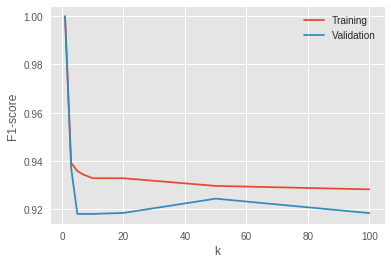

In [69]:
pd.Series(training_scores, name="Training").plot(kind="line")
pd.Series(validation_scores, name="Validation").plot(kind="line", label="Validation")
plt.legend()
plt.xlabel("k")
plt.ylabel("F1-score")
plt.show()

In [73]:
print(training_scores) 
print(validation_scores)

{1: 1.0, 3: 0.9391139179386385, 5: 0.935804639818995, 7: 0.9343018224659592, 10: 0.9328233138517558, 20: 0.9328070509913268, 50: 0.9296258909776576, 100: 0.9282034817351598}
{1: 1.0, 3: 0.936899516000867, 5: 0.9180133689839571, 7: 0.9180133689839571, 10: 0.9180133689839571, 20: 0.9184187788018434, 50: 0.9243426280430542, 100: 0.918352792405765}


In [0]:
# Select the value for the best value for k and set it to bestK
bestK = 50
#raise NotImplementedError()

In [0]:
clf = KNeighborsClassifier(bestK)
clf.fit(X_train, y_train)
testPredictions = clf.predict(X_test)

In [95]:
print("Confusion Matrix: \n")
print(confusion_matrix(y_test, testPredictions))
print("\n\nClassification Report:\n")
print(classification_report(y_test, testPredictions))

Confusion Matrix: 

[[50  1  7]
 [ 4 67  0]
 [ 6  1 64]]


Classification Report:

             precision    recall  f1-score   support

          0       0.83      0.86      0.85        58
          1       0.97      0.94      0.96        71
          2       0.90      0.90      0.90        71

avg / total       0.91      0.91      0.91       200



In [0]:
assert f1_score(y_test, testPredictions, average="weighted") > 0.9

## Feedback

In [0]:
def feedback():
    """Provide feedback on the contents of this exercise
    
    Returns:
        string
    """
    # YOUR CODE HERE
    raise NotImplementedError()